In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

## subplot

In [3]:
a = np.random.randn(50)

In [6]:
a.mean()
a.std()

1.0102641447618304

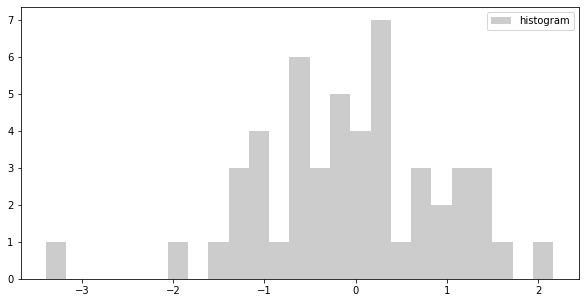

In [14]:
plt.figure(figsize=(10,5))
plt.hist(a, bins=25, color='k', alpha = 0.2, label = 'histogram')
plt.legend()

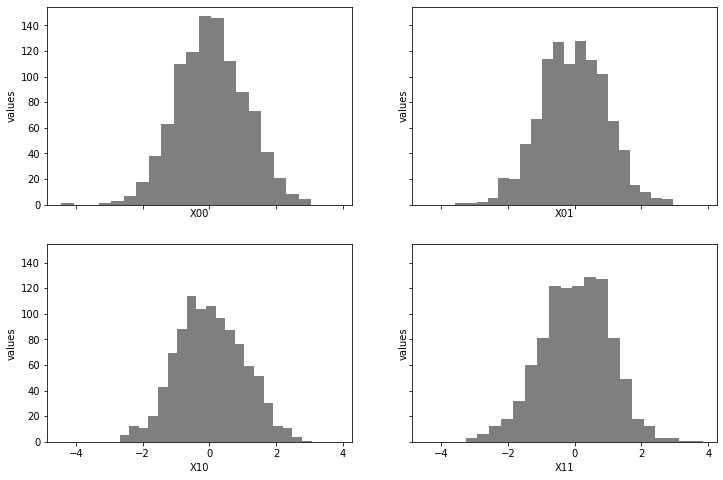

In [403]:
fig, axes = plt.subplots(2,2, sharex = True, sharey = True, figsize = (12,8))

for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(1000), bins=20, color = 'k', alpha=0.5)
        axes[i, j].set_xlabel('X{}{}'.format(i,j))
        axes[i, j].set_ylabel('values')
        
plt.subplots_adjust(wspace=0.2, hspace=0.2)

## 시계열 데이터 : spx data

데이터 불러오기

In [53]:
data = pd.read_csv('examples/spx.csv')

In [57]:
data.head(4)

,date,SPX
0,1990-02-01 00:00:00,328.79
1,1990-02-02 00:00:00,330.92
2,1990-02-05 00:00:00,331.85
3,1990-02-06 00:00:00,329.66


In [58]:
data.rename(columns={data.columns[0]:'date'}, inplace = True)

In [59]:
data.head(2)

,date,SPX
0,1990-02-01 00:00:00,328.79
1,1990-02-02 00:00:00,330.92


In [60]:
data.date[0]

'1990-02-01 00:00:00'

In [61]:
# 날짜 데이터 변환

date_spx = [datetime.strptime(x,'%Y-%m-%d %H:%M:%S') for x in data.date]

In [62]:
date_spx[:4]

[datetime.datetime(1990, 2, 1, 0, 0),
 datetime.datetime(1990, 2, 2, 0, 0),
 datetime.datetime(1990, 2, 5, 0, 0),
 datetime.datetime(1990, 2, 6, 0, 0)]

(732677.0, 734138.0)

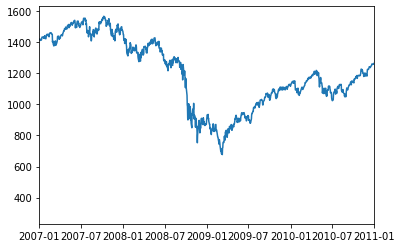

In [63]:
fig, ax = plt.subplots()

ax.plot(date_spx, data1['SPX'])
ax.set_xlim(['2007/1/1', '2011/1/1'])

### 데이터 날짜형으로 읽어오기

In [64]:
data1 = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)

In [65]:
spx = data1['SPX']

In [67]:
type(spx)

pandas.core.series.Series

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

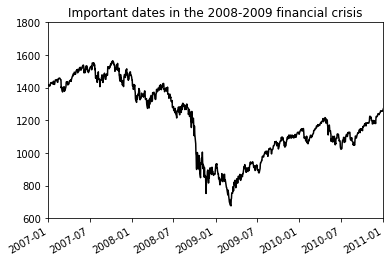

In [68]:
fig, ax = plt.subplots()

spx.plot(ax=ax, style='k-')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

### 중요 날짜 이벤트 annotation

In [69]:
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

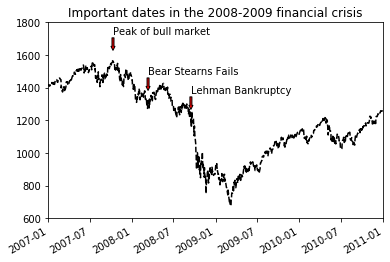

In [92]:
fig, ax = plt.subplots()

spx.plot(ax=ax, style='k--')

for date, event in crisis_data:
    ax.annotate(event, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='red', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

## barplot

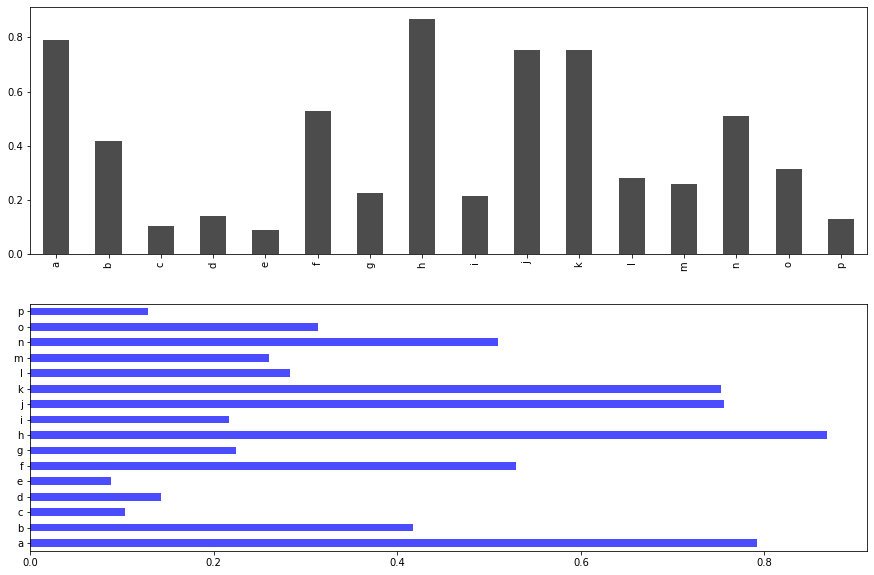

In [96]:
fig, axes = plt.subplots(2,1, figsize=(15,10))

data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax = axes[0], color = 'k', alpha = 0.7)
data.plot.barh(ax = axes[1], color = 'b', alpha = 0.7)

In [100]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [101]:
df

Genus,A,B,C,D
one,0.396267,0.464566,0.144864,0.535006
two,0.620008,0.221477,0.020161,0.949611
three,0.544975,0.362451,0.221690,0.006256
four,0.838400,0.634928,0.275072,0.447399
five,0.692291,0.820111,0.168362,0.036091
six,0.197767,0.801489,0.102197,0.726039


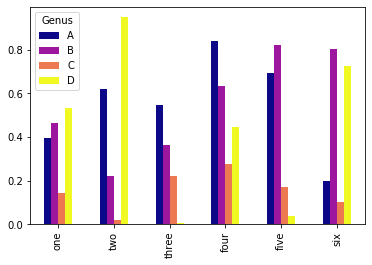

In [109]:
df.plot.bar(cmap = 'plasma')

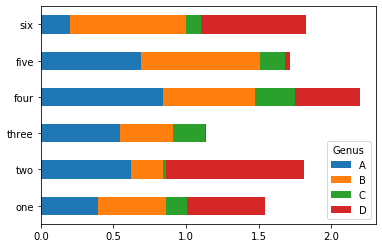

In [106]:
df.plot.barh(stacked=True)

## tips 데이터

- ex1) 요일별 팁의 액수를 합산하여 막대그래프 시각화(1인, 6인 파티는 제외)
- ex2) 요일별 파티 사이즈별 파티 횟수 카운트 하여 막대그래프 시각화(size 2,3,4인만 카운트)

In [2]:
import pandas as pd

In [5]:
tips = pd.read_csv('tips.csv')

In [4]:
tips.head(4)

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2


In [114]:
np.unique(tips.day)

array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object)

In [122]:
np.unique(tips['size'])

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [167]:
tips1 = tips.loc[~tips['size'].isin([1,6]),:]

In [170]:
np.unique(tips1['size'])

array([2, 3, 4, 5], dtype=int64)

In [188]:
a = tips1['tip'].groupby(tips['day']).sum()

In [189]:
a

day
Fri      50.04
Sat     258.40
Sun     242.39
Thur    154.10
Name: tip, dtype: float64

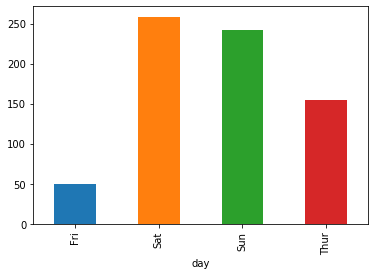

In [195]:
a.plot.bar()

In [196]:
a1 = a[['Thur','Fri','Sat','Sun']]

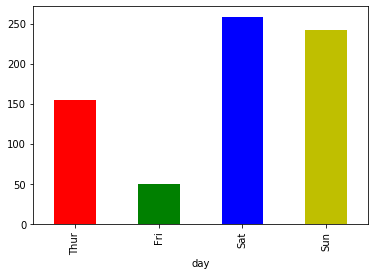

In [210]:
a1.plot.bar(color=['r','g','b','y'])

In [ ]:
# 요일별 파티 사이즈별 파티 횟수

In [247]:
tips2 = tips1.loc[~tips['size'].isin([5]),:]

In [249]:
np.unique(tips2['size'])

array([2, 3, 4], dtype=int64)

In [256]:
party_counts = pd.crosstab(tips2['day'],tips2['size'])

In [258]:
p_count = party_counts.loc[['Thur','Fri','Sat','Sun']]

In [260]:
p_count

size,2,3,4
day,,,
Thur,48,4,5
Fri,16,1,1
Sat,53,18,13
Sun,39,15,18


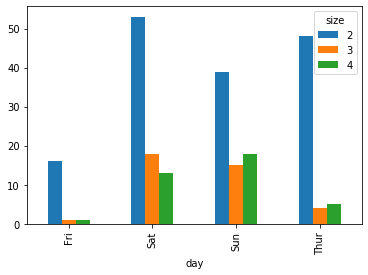

In [252]:
party_counts.plot.bar()

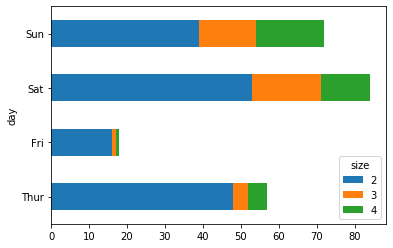

In [261]:
p_count.plot.barh(stacked=True)

### 산점도 행렬

In [382]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [383]:
iris_dataset = datasets.load_iris()

In [384]:
iris_dataframe = pd.DataFrame(iris_dataset['data'], columns = iris_dataset.feature_names)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D7A7BB550>,
      dtype=object)

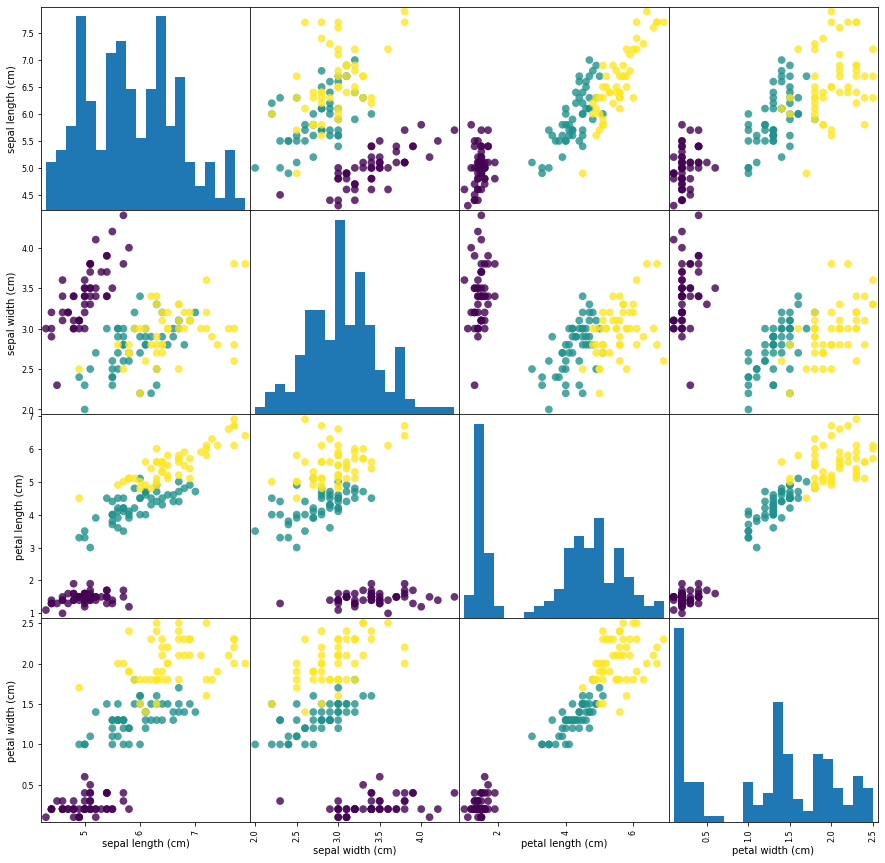

In [385]:
pd.plotting.scatter_matrix(iris_dataframe, c = iris_dataset['target'], figsize = (15,15),
                           marker = 'o', hist_kwds={'bins':20}, s = 60,
                           alpha = 0.8)

#### ex) target 포함 5 by 5 산점도 행렬

In [ ]:
column_names = iris_dataset.feature_names[0:4] + ['Species']
column_names

In [386]:
iris_dataframe1 = pd.DataFrame(iris_dataset['target'], columns = ['Species'])

In [387]:
iris_dataframe2 = pd.merge(iris_dataframe, iris_dataframe1, how='left', 
                           left_index = True, right_index = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D7B20F860>,
      dtype=object)

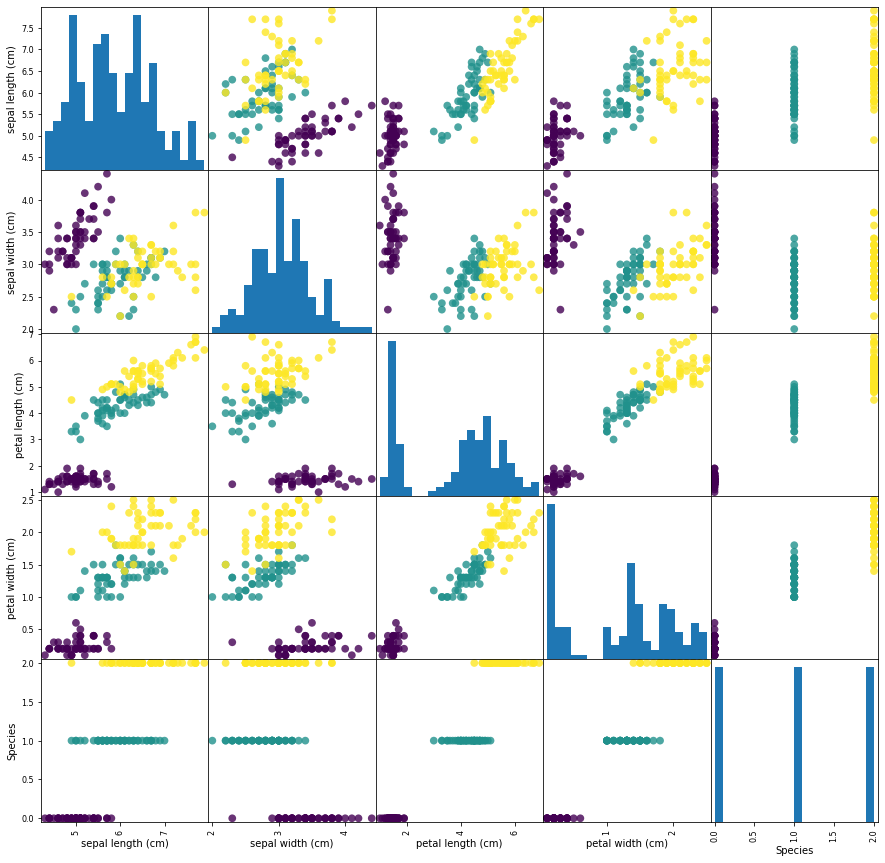

In [390]:
pd.plotting.scatter_matrix(iris_dataframe2, figsize = (15,15),
                           marker = 'o', hist_kwds={'bins':20}, s = 60,
                           alpha = 0.8, c=iris_dataset['target'])

### 히스토그램

#### ex) load_breast_cancer()  : 30개 feature 각각에 대한 타켓 클래스별 히스토그램 작성

In [395]:
cancer = datasets.load_breast_cancer()

In [397]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [396]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

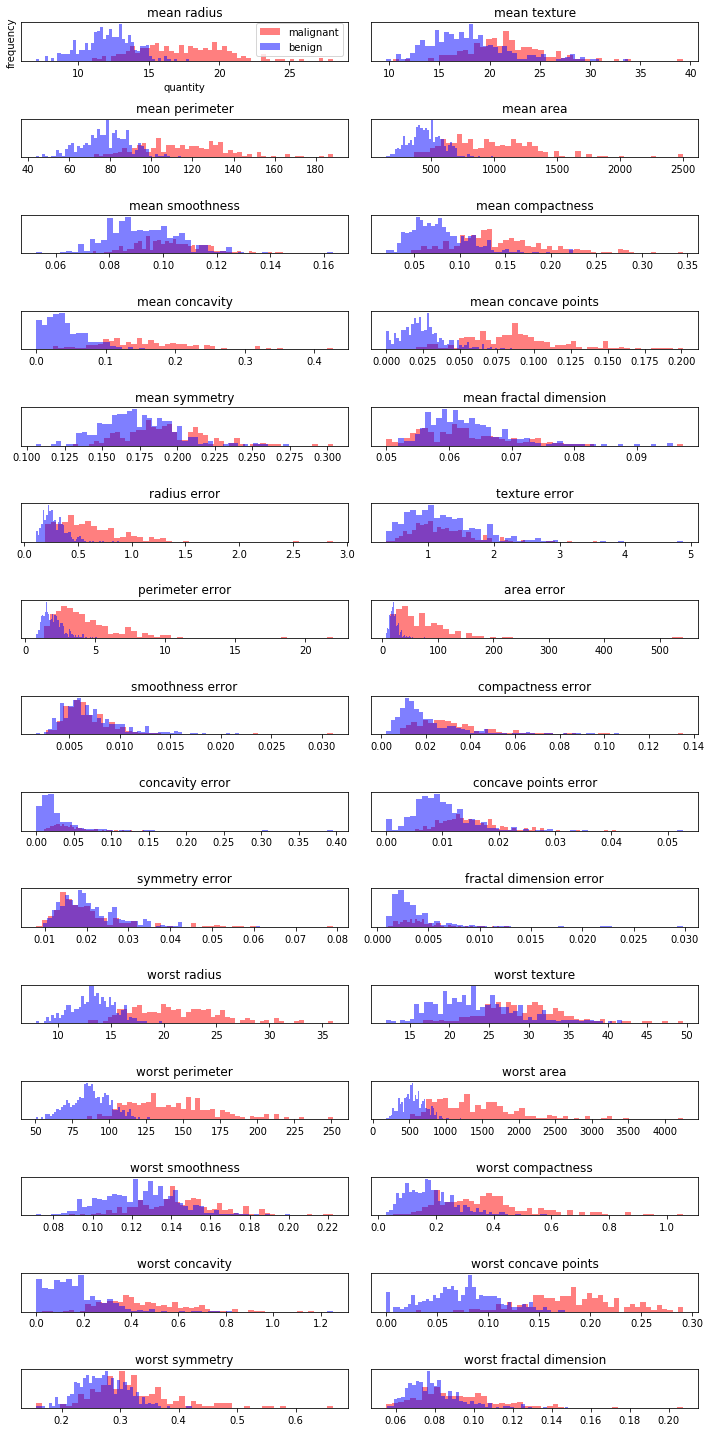

In [417]:

fig, axes = plt.subplots(15,2, figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
bins = 50
ax = axes.ravel()

for i in range(30):
    ax[i].hist(malignant[:,i], bins=bins, color = 'red', alpha=0.5)
    ax[i].hist(benign[:,i], bins=bins, color = 'blue', alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("quantity")
ax[0].set_ylabel("frequency")
ax[0].legend(['malignant','benign'], loc="best")
fig.tight_layout()

## heatmap

In [265]:
a = [0.001,0.01,0.1,1,10,100]*6
b = [0.001,0.01,0.1,1,10,100]*6

In [312]:
a.sort()

In [314]:
c = np.round(np.random.rand(36),2)

In [315]:
c

array([0.04, 0.63, 0.39, 0.12, 0.52, 0.47, 0.97, 0.29, 0.25, 0.96, 0.75,
       0.33, 0.85, 0.56, 0.96, 0.81, 0.18, 0.59, 0.38, 0.05, 0.09, 0.21,
       0.39, 0.23, 0.99, 0.2 , 0.54, 0.58, 0.31, 0.94, 0.3 , 0.5 , 0.93,
       0.15, 0.74, 0.35])

In [316]:
data = dict({'a':a, 'b':b, 'result':c})

In [337]:
df = pd.DataFrame(data)

In [338]:
df

,a,b,result
0,0.001,0.001,0.04
1,0.001,0.010,0.63
2,0.001,0.100,0.39
3,0.001,1.000,0.12
4,0.001,10.000,0.52
5,0.001,100.000,0.47
6,0.010,0.001,0.97
7,0.010,0.010,0.29
8,0.010,0.100,0.25
9,0.010,1.000,0.96


In [341]:
scores = np.array(df.result).reshape(6,6)

In [342]:
scores

array([[0.04, 0.63, 0.39, 0.12, 0.52, 0.47],
       [0.97, 0.29, 0.25, 0.96, 0.75, 0.33],
       [0.85, 0.56, 0.96, 0.81, 0.18, 0.59],
       [0.38, 0.05, 0.09, 0.21, 0.39, 0.23],
       [0.99, 0.2 , 0.54, 0.58, 0.31, 0.94],
       [0.3 , 0.5 , 0.93, 0.15, 0.74, 0.35]])

In [331]:
df1 = df.sort_values('result')

In [332]:
df1

,a,b,result
0,0.001,0.001,0.04
19,1.000,0.010,0.05
20,1.000,0.100,0.09
3,0.001,1.000,0.12
33,100.000,1.000,0.15
16,0.100,10.000,0.18
25,10.000,0.010,0.20
21,1.000,1.000,0.21
23,1.000,100.000,0.23
8,0.010,0.100,0.25


In [347]:
grid = {'a':[0.001,0.01,0.1,1,10,100],'b':[0.001,0.01,0.1,1,10,100]}

In [348]:
grid

{'a': [0.001, 0.01, 0.1, 1, 10, 100], 'b': [0.001, 0.01, 0.1, 1, 10, 100]}

Text(0.5, 0, 'b')

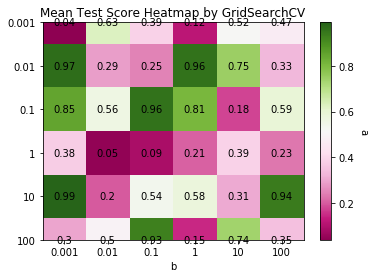

In [363]:
# 3. heatmap

scores = np.array(df.result).reshape(6,6)

fig, ax = plt.subplots()
im = ax.imshow(scores, cmap='PiYG')
cbar = ax.figure.colorbar(im, ax = ax)
cbar.ax.set_ylabel(ylabel="a", rotation = -90, va = "bottom")

ax.set_xticks(np.arange(len(set(df.b))))
ax.set_yticks(np.arange(len(set(df.a))))

ax.set_xticklabels(grid['b'])
ax.set_yticklabels(grid['a'])

for i in range(len(grid['a'])):
    for j in range(len(grid['b'])):
        text = ax.text(j, i, scores[i,j], ha = 'center',
                      va = 'center', color = 'k')
ax.set_title("Mean Test Score Heatmap by GridSearchCV")
ax.set_xlabel("b")